In [195]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
sns.set_style('darkgrid')
sns.set({'font.sans-serif': 'Arial'})

In [210]:
def aggregate_results(params):
    results = pd.DataFrame()
    for e in params['envnames']:
        with open('expert_results/'+e+'.pkl', 'rb') as f:
            expert_data = pickle.loads(f.read())
        for r in expert_data['returns']['all']:       
            results = results.append({'envname': e, 'returns': r, 
                            'std_returns': expert_data['returns']['std'], 
                            'policy': 'expert', }, ignore_index=True)  
        for n in params['num_neurons']:
            for lr in params['learning_rates']:
                for l in params['num_layers']:
                    for b in params['batch_size']:
                        for ne in params['num_epochs']:
                            run_type = 'n'+str(n)+'_lr'+str(lr)+'_l'+str(l)+'_b'+str(b)+'_ne'+str(ne)
                            with open('model_results/'+run_type+'/'+e+'-model.pkl', 'rb') as f:
                                data = pickle.loads(f.read())
                            for r in data['returns']['all']:
                                
#                             mean_returns = data['returns']['mean']
#                             std_returns = data['returns']['std']
                                results = results.append({'envname': e, 'num_neurons': n, 'learning_rates': lr, 
                                                'num_layers': l, 'batch_size': b, 'num_epochs': ne, 
                                                'returns': r,
                                                'policy': str(lr)}, ignore_index=True)                    
    return results

In [211]:
params = {
    'envnames': ['Reacher-v2'],
    'num_neurons': [64],
    'learning_rates': [.1, .075, .05, .01, .005, .001],
    'num_layers': [3],
    'batch_size': [16],
    'num_epochs': [10],
    'num_rollouts': 20
}

In [212]:
results = aggregate_results(params)

In [232]:
results[results.policy=='0.001'].returns.std()

1.9888716123896448

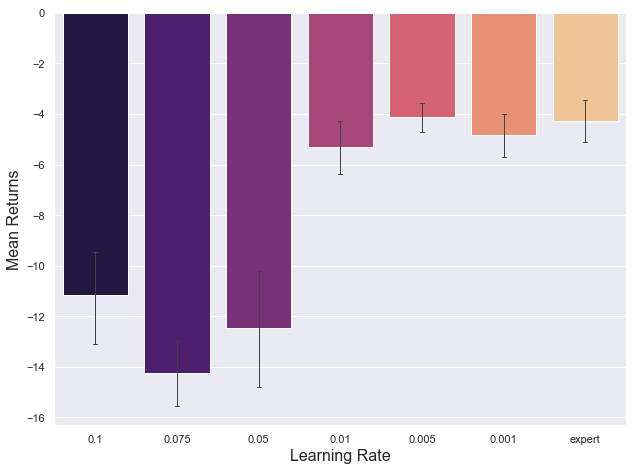

In [221]:
g = sns.catplot(data=results, x='policy', y='returns', 
                order=['0.1', '0.075', '0.05', '0.01', '0.005', '0.001', 'expert'], 
                kind="bar", palette='magma', errwidth=1, capsize=.05)
g.fig.set_size_inches(10,7)
plt.xlabel('Learning Rate', fontsize=16);
plt.ylabel('Mean Returns', fontsize=16);

In [236]:
with open('dagger_contrast/'+'Reacher-v2-model.pkl', 'rb') as f:
    dagger_contrast = pickle.loads(f.read())

In [257]:
with open('dagger/'+'Reacher-v2-model.pkl', 'rb') as f:
    dagger = pickle.loads(f.read())

In [262]:
dagger['dagger_iter']


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [243]:
dagger_contrast['observations'].shape

(1000, 11)

In [266]:
dagger = pd.DataFrame(dagger)

In [275]:
[np.mean(x) for x in dagger.returns]

[-3.7986680574459775,
 -4.3306967737168,
 -4.0808936197725645,
 -3.9819552103627522,
 -3.4780968975281352,
 -3.915185581529137,
 -4.133770345060759,
 -3.9968365580676086,
 -4.048904172683049,
 -3.927318563012382]

In [267]:
sns.barplot(data=dagger, x='dagger_iter', y='returns')

TypeError: unhashable type: 'numpy.ndarray'